Task 2: Movie Rating Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('IMDb_Movies_India.csv')


In [3]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.shape

(15509, 10)

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.head(50)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [7]:
df2=df.copy()

In [8]:
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df2.shape

(15509, 10)

In [10]:
#df2['Genre'].dropna()

In [11]:
new_genre = df2["Genre"].str.split(",", n=1, expand=True)

In [12]:
df2['Duration'] = pd.to_numeric(df2['Duration'].str.replace('[^\d]', '', regex=True))

In [13]:
df2.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
df3=df2.copy()

In [15]:
df3["Genre1"] = new_genre[0]
df3["Genre2"] = new_genre[1]
df3 = df3.drop("Genre",axis=1)
df3.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2
0,,NaN,NaN,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None
2,#Homecoming,-2021.0,90.0,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical
3,#Yaaram,-2019.0,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance
4,...And Once Again,-2010.0,105.0,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None


In [16]:
df3['Duration'] = df3['Duration'].fillna(df3['Duration'].median())

In [17]:
df3.isnull().sum()

Name           0
Year         528
Duration       0
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
Genre1      1877
Genre2      9308
dtype: int64

In [18]:
#Dropping the columns having more than 5000 missing values(genre2, Actor3)
df4 = df3.drop(columns=['Genre2','Actor 3', 'Year'], axis=1)

In [19]:
df4.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
0,,131.0,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Drama
1,#Gadhvi (He thought he was Gandhi),109.0,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Drama
2,#Homecoming,90.0,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Drama
3,#Yaaram,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy
4,...And Once Again,105.0,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Drama


In [20]:
df4.isnull().sum()

Name           0
Duration       0
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Genre1      1877
dtype: int64

In [21]:
df5 = df4.dropna(subset=['Rating'])

In [22]:
df5.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
1,#Gadhvi (He thought he was Gandhi),109.0,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Drama
3,#Yaaram,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy
5,...Aur Pyaar Ho Gaya,147.0,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy
6,...Yahaan,142.0,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama
8,?: A Question Mark,82.0,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror


In [23]:
df5.isnull().sum()

Name          0
Duration      0
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Genre1      102
dtype: int64

In [24]:
df6=df5.dropna()

In [25]:
df6.isnull().sum()

Name        0
Duration    0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Genre1      0
dtype: int64

In [26]:
df6.shape

(7641, 8)

In [27]:
df6['Votes'] = df6['Votes'].str.replace(',', '').astype(int)

C:\Users\Mahima Nair\AppData\Local\Temp\ipykernel_6088\3863123988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Votes'] = df6['Votes'].str.replace(',', '').astype(int)


In [28]:
df6['Votes'].dtype

dtype('int32')

In [29]:
df6.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
1,#Gadhvi (He thought he was Gandhi),109.0,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Drama
3,#Yaaram,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy
5,...Aur Pyaar Ho Gaya,147.0,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy
6,...Yahaan,142.0,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama
8,?: A Question Mark,82.0,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror


In [30]:
df6['Votes'].describe()

count      7641.000000
mean       2007.769402
std       11805.825912
min           5.000000
25%          17.000000
50%          59.000000
75%         447.000000
max      591417.000000
Name: Votes, dtype: float64

In [40]:
df7 = df6[df6['Votes'] >= 20]

In [41]:
df7.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
3,#Yaaram,110.0,4.4,35,Ovais Khan,Prateik,Ishita Raj,Comedy
5,...Aur Pyaar Ho Gaya,147.0,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy
6,...Yahaan,142.0,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama
8,?: A Question Mark,82.0,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror
11,1:13:7 Ek Tera Saath,120.0,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Horror


In [42]:
df7.shape

(5539, 8)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
df7['Rating'] = scaler.fit_transform(df7[['Rating']])
df7['Rating'] = df7['Rating'].round(2)
df7.head()

C:\Users\Mahima Nair\AppData\Local\Temp\ipykernel_6088\1752535589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Rating'] = scaler.fit_transform(df7[['Rating']])
C:\Users\Mahima Nair\AppData\Local\Temp\ipykernel_6088\1752535589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Rating'] = df7['Rating'].round(2)


,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
3,#Yaaram,110.0,2.55,35,Ovais Khan,Prateik,Ishita Raj,Comedy
5,...Aur Pyaar Ho Gaya,147.0,2.69,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy
6,...Yahaan,142.0,3.96,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama
8,?: A Question Mark,82.0,3.12,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror
11,1:13:7 Ek Tera Saath,120.0,3.26,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Horror


In [44]:
df7['Director'].nunique()

2177

In [45]:
df7['Actor 1'].nunique()

1718

In [46]:
df7['Genre1'].nunique()

20

#df9 = df6
actor1_ratings = df9.groupby('Actor 1')['Rating'].mean()
actor2_ratings = df9.groupby('Actor 2')['Rating'].mean()
director_ratings = df9.groupby('Director')['Rating'].mean()

mapping_dict_actor1 = actor1_ratings.to_dict()
mapping_dict_actor2 = actor2_ratings.to_dict()
mapping_dict_director = director_ratings.to_dict()

dfa1=pd.DataFrame(list(mapping_dict_actor1.items()),columns=['Actor 1', 'Rating'])
dfa2=pd.DataFrame(list(mapping_dict_actor2.items()),columns=['Actor 2', 'Rating'])
dfa3=pd.DataFrame(list(mapping_dict_director.items()),columns=['Director', 'Rating'])


dfa1.head()

average_ratings = df6.groupby('Actor 1')['Rating'].mean()

average_ratings

average_ratings.isnull().sum()

mapping_dict = average_ratings.to_dict()

mapping_dict

dft=pd.DataFrame(list(mapping_dict.items()),columns=['Actor 1', 'Rate'])

dft.head()

 dft.to_csv("Ratings.csv", index=False)

df7=df6

df4.isnull().sum()

df7['name_avg_rating'] = df7['Actor 1'].map(mapping_dict)

In [47]:
df7.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
3,#Yaaram,110.0,2.55,35,Ovais Khan,Prateik,Ishita Raj,Comedy
5,...Aur Pyaar Ho Gaya,147.0,2.69,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Comedy
6,...Yahaan,142.0,3.96,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Drama
8,?: A Question Mark,82.0,3.12,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Horror
11,1:13:7 Ek Tera Saath,120.0,3.26,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Horror


In [48]:
df7.shape

(5539, 8)

In [49]:
def merge_dicts(dict1, dict2):
    merged_dict = {}
    
    # Get all keys from both dictionaries
    all_keys = set(dict1.keys()).union(set(dict2.keys()))
    
    for key in all_keys:
        if key in dict1 and key in dict2:
            # If key is in both dictionaries, compute the mean
            merged_dict[key] = (dict1[key] + dict2[key]) / 2
        elif key in dict1:
            # If key is only in dict1
            merged_dict[key] = dict1[key]
        else:
            # If key is only in dict2
            merged_dict[key] = dict2[key]
    
    return merged_dict


In [62]:
def df_name_to_rating(df):
    actor1_ratings = df.groupby('Actor 1')['Rating'].mean().round(2)
    actor2_ratings = df.groupby('Actor 2')['Rating'].mean().round(2)
    director_ratings = df.groupby('Director')['Rating'].mean().round(2)
    
    mapping_dict_actor1 = actor1_ratings.to_dict()
    mapping_dict_actor2 = actor2_ratings.to_dict()
    merged_actor_dict = merge_dicts(mapping_dict_actor1,mapping_dict_actor2)
    mapping_dict_director = director_ratings.to_dict()
    
    df_at=pd.DataFrame(list(merged_actor_dict.items()),columns=['Actor', 'Rating_Actor'])
    #dfa2=pd.DataFrame(list(mapping_dict_actor2.items()),columns=['Actor 2', 'Rating_Actor2'])
    df_dr=pd.DataFrame(list(mapping_dict_director.items()),columns=['Director', 'Rating_Director'])

    #merged_actor_df = pd.merge(dfa1, dfa2, left_on='Actor 1', right_on='Actor 2', how='outer')
   

    #df_final = pd.concat([dfa1, dfa2, dfa3], sort=False)
    
    # Save DataFrame to CSV
    df_at.to_csv("Actor_Ratings_1.csv", index=False)
    df_dr.to_csv("Director_1.csv", index=False)
    
    df['Actor 1'] = df['Actor 1'].map(mapping_dict_actor1)
    df['Actor 2'] = df['Actor 2'].map(mapping_dict_actor2)
    df['Director'] = df['Director'].map(mapping_dict_director)
    
    return df
    
    



    

In [63]:
df8=df7.copy()

In [64]:
df8 = df_name_to_rating(df8)

In [65]:
df8.head()

,Name,Duration,Rating,Votes,Director,Actor 1,Actor 2,Genre1
3,#Yaaram,110.0,2.55,35,2.55,3.03,2.55,Comedy
5,...Aur Pyaar Ho Gaya,147.0,2.69,827,3.01,2.74,3.20,Comedy
6,...Yahaan,142.0,3.96,1086,4.01,2.98,3.33,Drama
8,?: A Question Mark,82.0,3.12,326,3.12,3.12,3.46,Horror
11,1:13:7 Ek Tera Saath,120.0,3.26,59,3.76,3.33,3.26,Horror


In [66]:
df8.shape

(5539, 8)

In [59]:
# Convert dictionary to DataFrame
#df = pd.DataFrame(data)

# Specify the CSV file path
#csv_file = 'data.csv'

#df = pd.read_csv('data.csv')

# Find the rating of 'abc'
#rating_of_abc = df[df['name'] == 'abc']['Rating'].values[0]

In [67]:
df_actor_rating= pd.read_csv("Actor_Ratings_1.csv")
df_actor_rating.head()

,Actor,Rating_Actor
0,Murad Ali,3.545
1,Samrat,2.320
2,Hannah Spearritt,3.120
3,Mayank Tewari,3.820
4,Tejaswini Manogna,4.860


In [68]:
df_actor_rating.shape

(3119, 2)

In [69]:
df_dr_rating= pd.read_csv("Director_1.csv")
df_dr_rating.head()

,Director,Rating_Director
0,A. Bhimsingh,3.67
1,A. Jagannathan,3.23
2,A. Kodandarami Reddy,3.87
3,A. Majid,3.16
4,A. Muthu,1.89


In [70]:
df9 = df8.drop(columns=["Votes","Name"], axis=1)
df9.head()

,Duration,Rating,Director,Actor 1,Actor 2,Genre1
3,110.0,2.55,2.55,3.03,2.55,Comedy
5,147.0,2.69,3.01,2.74,3.20,Comedy
6,142.0,3.96,4.01,2.98,3.33,Drama
8,82.0,3.12,3.12,3.12,3.46,Horror
11,120.0,3.26,3.76,3.33,3.26,Horror


In [92]:
df11 = df9.drop(columns=["Genre1"], axis=1)

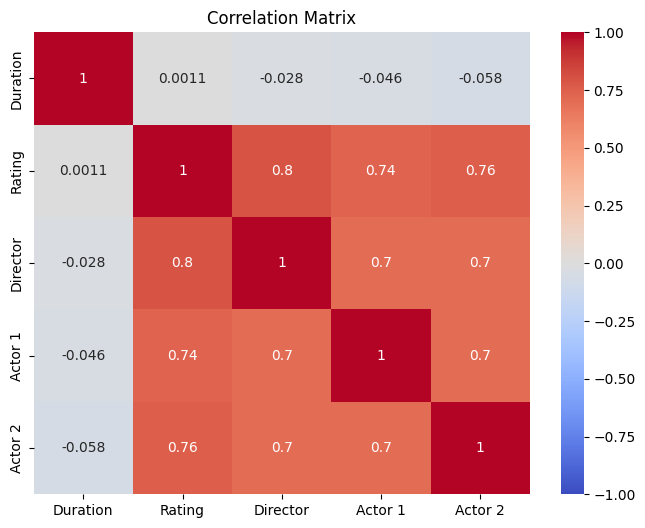

In [98]:
import seaborn as sns
corr_matrix = df11.corr()

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [106]:
df12=df9.drop(columns=["Duration"], axis=1)

In [107]:
#use get_dummies function of pandas to perform one hot encoding(changing categorical to binary attributes)
dummies = pd.get_dummies(df12.Genre1)
dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [108]:
#def input_name_to_rating(name):

genre_stats = df8.groupby('Genre1')['Genre1'].agg('count').sort_values(ascending=False)
genre_stats

Genre1
Action         1717
Drama          1713
Comedy         1011
Crime           266
Romance         159
Horror          112
Musical          89
Adventure        83
Biography        77
Thriller         77
Mystery          56
Family           52
Documentary      48
Animation        38
Fantasy          23
Sci-Fi            5
History           5
Music             3
War               3
Sport             2
Name: Genre1, dtype: int64

In [109]:
df10 = pd.concat([df12,dummies.drop('War',axis='columns')], axis='columns') #to avoid a dummy variable trap in one hot encoding, we can drop one column and to represent the value of 1st column use 00000...00
df10.head()

,Rating,Director,Actor 1,Actor 2,Genre1,Action,Adventure,Animation,Biography,Comedy,...,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller
3,2.55,2.55,3.03,2.55,Comedy,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,2.69,3.01,2.74,3.20,Comedy,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,3.96,4.01,2.98,3.33,Drama,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3.12,3.12,3.12,3.46,Horror,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11,3.26,3.76,3.33,3.26,Horror,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [110]:
df12.head()

,Rating,Director,Actor 1,Actor 2,Genre1
3,2.55,2.55,3.03,2.55,Comedy
5,2.69,3.01,2.74,3.20,Comedy
6,3.96,4.01,2.98,3.33,Drama
8,3.12,3.12,3.12,3.46,Horror
11,3.26,3.76,3.33,3.26,Horror


In [111]:
df10 = df10.drop("Genre1", axis=1)

In [112]:
df10.head()

,Rating,Director,Actor 1,Actor 2,Action,Adventure,Animation,Biography,Comedy,Crime,...,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller
3,2.55,2.55,3.03,2.55,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,2.69,3.01,2.74,3.20,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,3.96,4.01,2.98,3.33,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3.12,3.12,3.12,3.46,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11,3.26,3.76,3.33,3.26,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Machine Learning model built

In [113]:
X = df10.drop(columns=["Rating"], axis=1)
X.head()

,Director,Actor 1,Actor 2,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller
3,2.55,3.03,2.55,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3.01,2.74,3.20,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,4.01,2.98,3.33,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3.12,3.12,3.46,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11,3.76,3.33,3.26,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [114]:
Y = df10["Rating"]
Y.head()

3     2.55
5     2.69
6     3.96
8     3.12
11    3.26
Name: Rating, dtype: float64

In [115]:
#Train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Number of subsets
num_subsets = 10

# To store the results
predictions = []
actuals = []
errors = []

# Train-test splits and model training
for _ in range(num_subsets):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    predictions.append(y_pred)
    actuals.append(y_test)
    errors.append(y_test - y_pred)

# Convert lists to arrays for easier manipulation
predictions = np.array(predictions)
actuals = np.array(actuals)
errors = np.array(errors)

# Calculate the mean prediction for each data point
mean_predictions = np.mean(predictions, axis=0)

# Bias calculation: mean error
bias = np.mean(errors)

# Variance calculation: average of the squared differences between each prediction and the mean prediction
variance = np.mean((predictions - mean_predictions) ** 2)

print(f'Bias: {bias}')
print(f'Variance: {variance}')


Bias: 0.004345655474467558
Variance: 0.28182996653095616


In [120]:
#To improve the accuracy by k folds cross validation of dataset to find optimal mix of data that provides max information and makes a good model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.74097294, 0.74463989, 0.74347514, 0.72211713, 0.73324514])

In [121]:
#To try different regressor models and find out which one gives the best score
#Use Grid Search CV for this method

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridSearchCV(X,y):
    #python dictionary of algos to compare
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                #'normalize':[True, False]
            }
        },
        'lasso' :{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['squared_error','friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    
#The gridSearch method will not only search the best model, but will also find the best hyperparameters for the model. This is known as Hyperparameter Tuning
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        #Training each of the model and finding the score might take time

        #return the score of each of the model for us to evaluate the best one
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])


In [122]:
find_best_model_using_gridSearchCV(X,Y)

,model,best_score,best_params
0,linear_regression,0.736890,{}
1,lasso,-0.000766,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.501338,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [124]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
linearModel.score(X_test, y_test)

0.7236937024492561

In [125]:
X_train.columns

Index(['Director', 'Actor 1', 'Actor 2', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller'],
      dtype='object')

In [129]:
#both linear and lasso is giving a good result compared to decision tree
#Choosing Linear(85.7%) score 
#linear is already trained in cell 71

def predict_rate(director,actor1,actor2,genre):
    genre_index = np.where(X.columns==genre)[0][0]  #find location index and set that particular index value in predict array to 1 thereby converting it to binary for simpler model built
    x = np.zeros(len(X.columns))
    #x[0] = duration
    x[0] = df_dr_rating[df_dr_rating['Director'] == director]['Rating_Director'].values[0]
    x[1] = df_actor_rating[df_actor_rating['Actor'] == actor1]['Rating_Actor'].values[0]
    x[2] = df_actor_rating[df_actor_rating['Actor'] == actor2]['Rating_Actor'].values[0]

    
    if genre_index >0:
        x[genre_index] = 1
    return linearModel.predict([x])[0]


In [130]:
df_actor_rating.head(100)

,Actor,Rating_Actor
0,Murad Ali,3.545
1,Samrat,2.320
2,Hannah Spearritt,3.120
3,Mayank Tewari,3.820
4,Tejaswini Manogna,4.860
...,...,...
95,Simran Ahemad,2.600
96,Sulakshana Pandit,3.150
97,Gagan Guru,3.210
98,Ameesha Patel,2.075


In [132]:
predict_rate("Abrar Alvi","Rishi Kapoor","Pankaj Tripathi","Action")

C:\Users\Mahima Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3.9070656748145507

In [133]:
df11.head()

,Duration,Rating,Director,Actor 1,Actor 2
3,110.0,2.55,2.55,3.03,2.55
5,147.0,2.69,3.01,2.74,3.20
6,142.0,3.96,4.01,2.98,3.33
8,82.0,3.12,3.12,3.12,3.46
11,120.0,3.26,3.76,3.33,3.26


In [137]:
from sklearn.linear_model import Ridge
# Fit Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)

# Evaluate model
y_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.7237796255519611

In [138]:
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_train, y_train)

# Evaluate model
lasso.score(X_test, y_test)

0.6181412780954954

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Evaluate model
rf_regressor.score(X_test, y_test)

0.715932561128872